In [61]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import ipeadatapy

In [36]:
def load_data():
    # Load the CSV data
    df = pd.read_csv('dados/Unidades_Basicas_Saude-UBS.csv', encoding='utf-8', sep=';')

    df['LATITUDE'] = df['LATITUDE'].astype(str).str.replace(',', '.').astype(float)
    df['LONGITUDE'] = df['LONGITUDE'].astype(str).str.replace(',', '.').astype(float)

    # Load the shapefile data
    gdf = gpd.read_file('dados/PR_Municipios_2024/PR_Municipios_2024.shp')

    return df, gdf

In [37]:
ubs, municipios_pr = load_data()

ubs_pr = ubs[ubs['UF'] == 41]

In [56]:
def cluster_ubs_pr():
    ubs_pr_clear = ubs_pr.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()
    X = ubs_pr_clear[['LONGITUDE', 'LATITUDE']]
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
    kmeans.fit(X)

    ubs_pr_clear['cluster'] = kmeans.labels_
    ubs_pr_clear['geometry'] = gpd.points_from_xy(ubs_pr_clear['LONGITUDE'], ubs_pr_clear['LATITUDE'])
    return ubs_pr_clear, kmeans

In [86]:
# https://www.ipeadata.gov.br/Default.aspx
def cluster_idh_pr():
    pass

df_themes = ipeadatapy.list_series('IDHM')
print(df_themes)

                CODE                                               NAME
1694  ADH_IDHM_E_HOM  IDHM - Índice de Desenvolvimento Humano Munici...
1695  ADH_IDHM_E_MUL  IDHM - Índice de Desenvolvimento Humano Munici...
1696    ADH_IDHM_HOM  IDHM - Índice de Desenvolvimento Humano Munici...
1697  ADH_IDHM_L_HOM  IDHM - Índice de Desenvolvimento Humano Munici...
1698  ADH_IDHM_L_MUL  IDHM - Índice de Desenvolvimento Humano Munici...
1699    ADH_IDHM_MUL  IDHM - Índice de Desenvolvimento Humano Munici...
1700  ADH_IDHM_R_HOM  IDHM - Índice de Desenvolvimento Humano Munici...
1701  ADH_IDHM_R_MUL  IDHM - Índice de Desenvolvimento Humano Munici...
1702    ADH_IDHM_BRA  IDHM - Índice de Desenvolvimento Humano Munici...
1703  ADH_IDHM_E_BRA  IDHM - Índice de Desenvolvimento Humano Munici...
1704  ADH_IDHM_E_NEG  IDHM - Índice de Desenvolvimento Humano Munici...
1705  ADH_IDHM_L_BRA  IDHM - Índice de Desenvolvimento Humano Munici...
1706  ADH_IDHM_L_NEG  IDHM - Índice de Desenvolvimento Humano Mu

In [ ]:
def cluster_malha_pr():
    pass

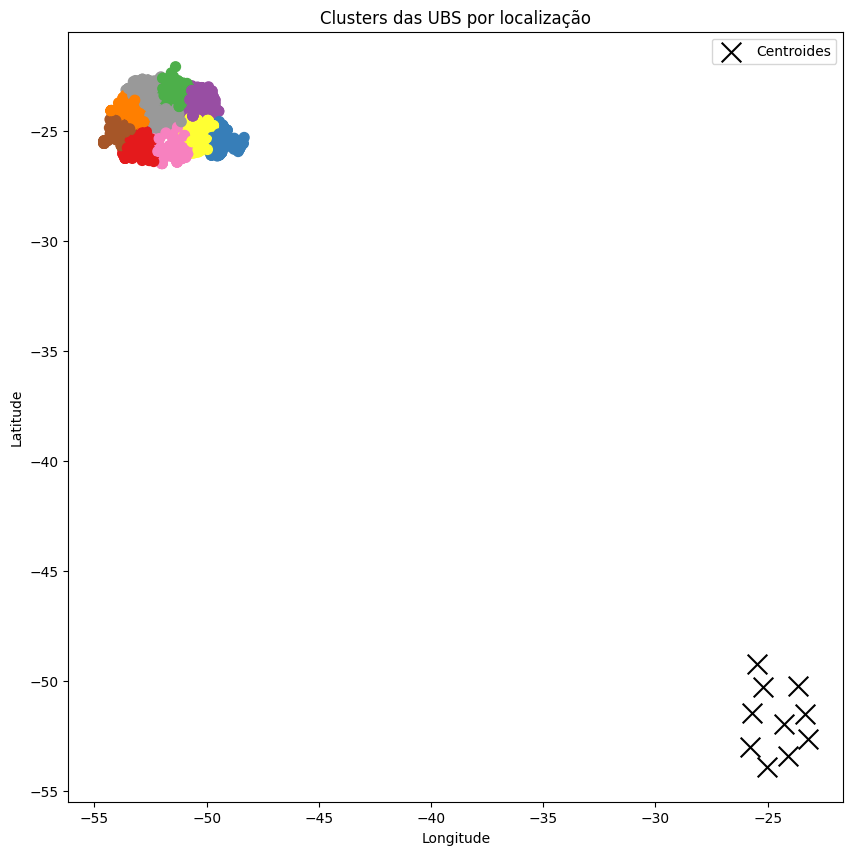

In [58]:
ubs_pr_clustered, kmeans = cluster_ubs_pr()

plt.figure(figsize=(10, 10))
plt.scatter(ubs_pr_clustered['LONGITUDE'], ubs_pr_clustered['LATITUDE'], c=ubs_pr_clustered['cluster'], cmap='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0],
            c='black', marker='x', s=200, label='Centroides')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters das UBS por localização')
plt.legend()
plt.show()